# Evaluation of model Training time

In [3]:
import sys
sys.path.append('..')
from neighbors.KNNRegressor import KNNRegressor

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import time
import matplotlib.pyplot as plt


In [26]:
# we will test prediction time for our model for datasets of different sizes

# we will import a larger dataset

data = fetch_california_housing()

# convert the data to a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
df['target'] = data.target


X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNNRegressor object
knn = KNNRegressor(5)

dataset_sizes_1 = [2*i for i in range(1, 500)]
times = []

for size in dataset_sizes_1:
    start = time.time()
    knn.fit(X_train[:size], y_train[:size])
    knn.predict(X_test[:size])
    end = time.time()
    times.append(end - start)





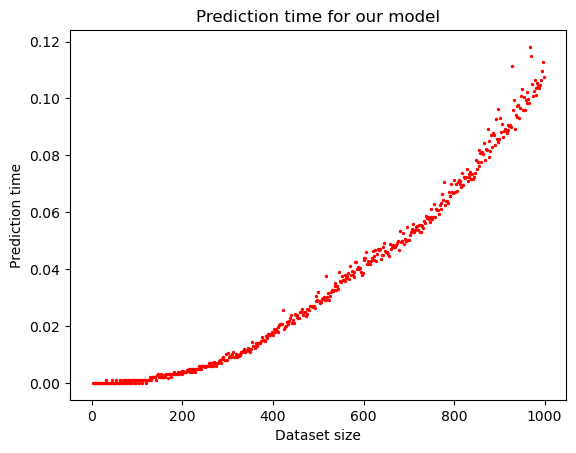

In [27]:

plt.xlabel('Dataset size')
plt.ylabel('Prediction time')
plt.title('Prediction time for our model')


plt.scatter(dataset_sizes_1, times, c='r', label='our model', s=2)

# Evaluation of Optimized KNNRegressor

In [39]:
from neighbors.OptimizedKNNRegressor import OptimizedKNNRegressor

# Create a KNeighborsRegressor object
knn = OptimizedKNNRegressor(5)

dataset_sizes_2 = [2*i for i in range(10, 1000)]
times = []

for size in dataset_sizes_2:
    start = time.time()
    knn.fit(X_train[:size], y_train[:size])
    knn.predict(X_test[:size])
    end = time.time()
    times.append(end - start)



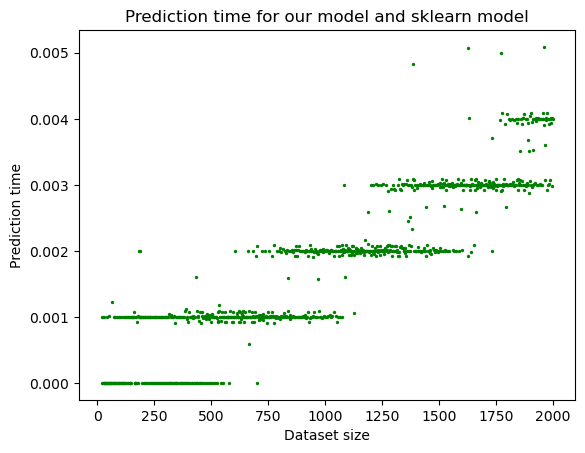

In [43]:


plt.xlabel('Dataset size')
plt.ylabel('Prediction time')
plt.title('Prediction time for our model and sklearn model')

plt.scatter(dataset_sizes_2, times, c='g', label='sklearn model', s=2)


# Evaluation of sklearn KNNRegressor

In [44]:
# we will compare the performance of our model with the sklearn KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# Create a KNeighborsRegressor object
knn = KNeighborsRegressor(n_neighbors=5)

dataset_sizes = [2*i for i in range(10, 1000)]
times_sklearn = []

for size in dataset_sizes:
    start = time.time()
    knn.fit(X_train[:size], y_train[:size])
    knn.predict(X_test[:size])
    end = time.time()
    times_sklearn.append(end - start)




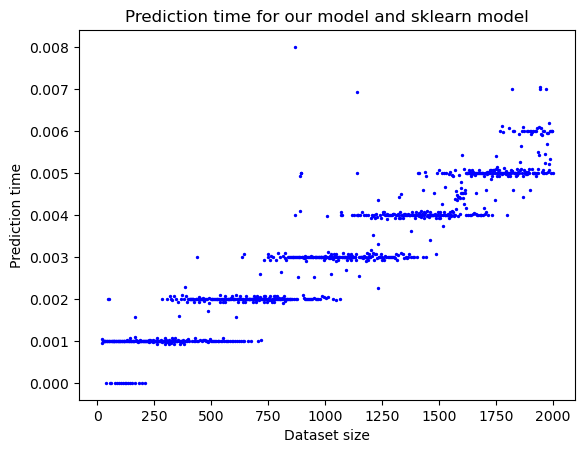

In [45]:

plt.xlabel('Dataset size')
plt.ylabel('Prediction time')
plt.title('Prediction time for our model and sklearn model')

plt.scatter(dataset_sizes, times_sklearn, c='b', label='sklearn model', s=2)

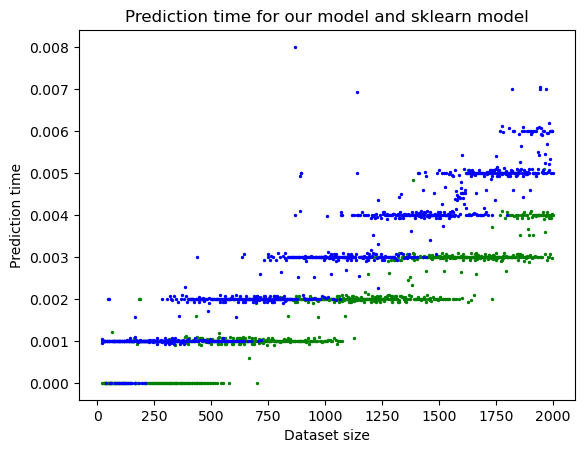

In [46]:
# we will group the two plots in one plot

plt.xlabel('Dataset size')
plt.ylabel('Prediction time')
plt.title('Prediction time for our model and sklearn model')

plt.scatter(dataset_sizes_2, times, c='g', label='our model', s=2)
plt.scatter(dataset_sizes, times_sklearn, c='b', label='sklearn model', s=2)

# Testing of Models Accuracy

In [47]:
# we will compare the performance of our model with the sklearn KNeighborsRegressor

knn = OptimizedKNNRegressor(5)
knn_sklearn = KNeighborsRegressor(n_neighbors=5)

dataset_sizes = [2*i for i in range(10, 1000)]
accuracies = []
accuracies_sklearn = []

for size in dataset_sizes:
    knn.fit(X_train[:size], y_train[:size])
    knn_sklearn.fit(X_train[:size], y_train[:size])

    y_pred = knn.predict(X_test[:size])
    y_pred_sklearn = knn_sklearn.predict(X_test[:size])

    accuracies.append(mean_squared_error(y_test[:size], y_pred))
    accuracies_sklearn.append(mean_squared_error(y_test[:size], y_pred_sklearn))




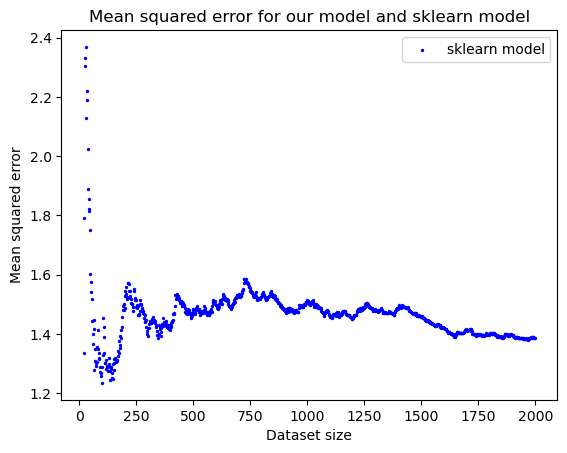

In [51]:
plt.xlabel('Dataset size')
plt.ylabel('Mean squared error')
plt.title('Mean squared error for our model and sklearn model')

#plt.scatter(dataset_sizes, accuracies, c='g', label='our model', s=2)
plt.scatter(dataset_sizes, accuracies_sklearn, c='b', label='sklearn model', s=2)

plt.legend()
plt.show()

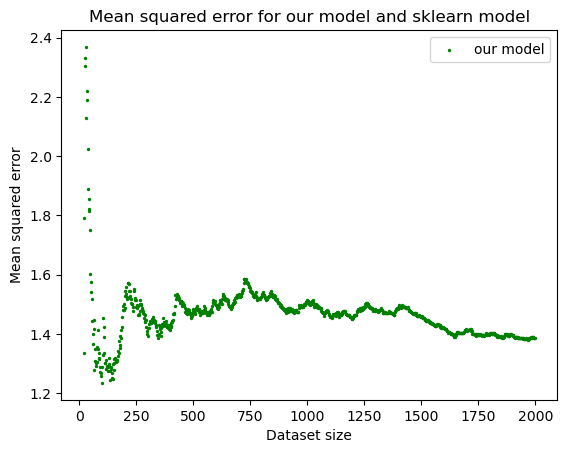

In [52]:
plt.xlabel('Dataset size')
plt.ylabel('Mean squared error')
plt.title('Mean squared error for our model and sklearn model')

plt.scatter(dataset_sizes, accuracies, c='g', label='our model', s=2)
#plt.scatter(dataset_sizes, accuracies_sklearn, c='b', label='sklearn model', s=2)

plt.legend()
plt.show()